## 1. 데이터 파일 압축 해제

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/4-1 통계머신러닝/과제/10 24_과제2/A_Z.zip')
zip_file.extractall('/content/drive/MyDrive/4-1 통계머신러닝/과제/10 24_과제2/')

---

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import numpy as np
from PIL import Image

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.preprocessing import LabelEncoder

import pandas as pd


## 2. 데이터 출력하기

In [ ]:
img_dir = '/content/drive/MyDrive/4-1 통계머신러닝/과제/10 24_과제2/A_Z'

folders = [chr(i) for i in range(ord('A'),ord('Z')+1)]

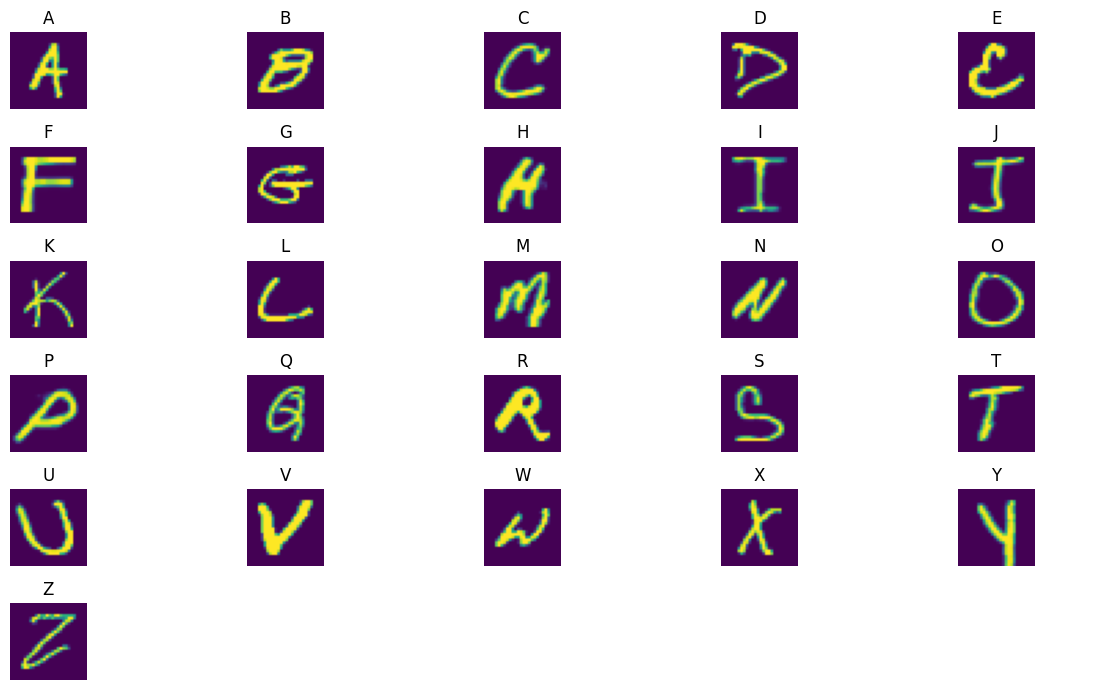

In [ ]:
fig,axes = plt.subplots(6,5, figsize=(12,7))

for idx, folder in enumerate(folders):
  img_path = os.path.join(img_dir, folder, f"{folder}-0.png")
  ax = axes[idx//5, idx%5]

  if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(folder)

  ax.axis('off')


  for j in range(len(folders), 30):
    axes[j//5, j%5].axis('off')

plt.tight_layout()
plt.show()

## 3. 그림을 numpy arr로 변환하여 훈련에 적합한 데이터로 변경

In [ ]:
for folder in folders:
    folder_path = os.path.join(img_dir, folder)
    if not os.path.exists(folder_path):
        continue

    sizes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".png"):
            file_path = os.path.join(folder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    sizes.append(img.size)  # (width, height)
            except:
                pass

    if sizes:
        widths, heights = zip(*sizes)
        print(f"[{folder}]")
        print(f" - 개수: {len(sizes)}")
        print(f" - 평균 크기: {np.mean(widths):.1f} × {np.mean(heights):.1f}")
        print(f" - 최소 크기: {np.min(widths)} × {np.min(heights)}")
        print(f" - 최대 크기: {np.max(widths)} × {np.max(heights)}")
        print("-" * 50)


[A]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[B]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[C]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[D]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[E]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[F]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[G]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------
[H]
 - 개수: 1000
 - 평균 크기: 28.0 × 28.0
 - 최소 크기: 28 × 28
 - 최대 크기: 28 × 28
--------------------------------------------------


-> 이미지의 모든 사이즈가 (28, 28)로 동일

In [ ]:
images = []
labels = []

for folder in folders:
    folder_path = os.path.join(img_dir, folder)
    if not os.path.exists(folder_path):
        continue

    # 각 폴더의 모든 PNG 파일 로드
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)

            # 이미지 불러오기
            # 이미지의 모든 사이즈가 (28, 28)로 동일
            img = load_img(file_path, color_mode='grayscale')
            arr = img_to_array(img)
            images.append(arr)
            labels.append(folder)

# numpy 배열로 변환
x = np.array(images) / 255.0
y = np.array(labels)

print(" x shape:", x.shape)
print(" y shape:", y.shape)


 x shape: (26000, 28, 28, 1)
 y shape: (26000,)


In [ ]:
encoder = LabelEncoder()
y_int = encoder.fit_transform(y)

y_onehot = keras.utils.to_categorical(y_int, num_classes=26)

In [ ]:
# 순서대로 A~Z가 구분되어 있으므로 섞어서 데이터 슬라이싱을 통해 분리하기 위함

# 전체 데이터 인덱스 생성
indices = np.arange(len(x))
np.random.seed(21)
np.random.shuffle(indices)

x = x[indices]
y_onehot = y_onehot[indices]

## 4. training/ validation/ test 데이터 분류

In [ ]:
# 전체 개수
dataset_size = len(x)
train_size = int(0.8 * dataset_size)
test_size = int(0.2 * dataset_size)
val_size = int(0.2 * test_size)

print(dataset_size, train_size, val_size, test_size)

26000 20800 1040 5200


In [ ]:
x_train = x[:train_size]
y_onehot_train = y_onehot[:train_size]

x_val = x[train_size:(train_size+val_size)]
y_onehot_val = y_onehot[train_size:(train_size+val_size)]

x_test = x[(train_size+val_size):]
y_onehot_test = y_onehot[(train_size+val_size):]

print(x_train.shape, y_onehot_train.shape)
print(x_val.shape, y_onehot_val.shape)
print(x_test.shape, y_onehot_test.shape)

(20800, 28, 28, 1) (20800, 26)
(1040, 28, 28, 1) (1040, 26)
(4160, 28, 28, 1) (4160, 26)


## 5. 훈련에 사용할 모형 생성

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(26,activation="softmax"))

In [ ]:
model.layers

[<Flatten name=flatten_7, built=True>,
 <Dense name=dense_26, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 26)             │         2,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,526 (2.20 MB)

 Trainable params: 575,526 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [ ]:
train_n = model.fit(x_train, y_onehot_train, epochs=50,
                    validation_data=(x_val, y_onehot_val))

Epoch 1/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2710 - loss: 2.8042 - val_accuracy: 0.7365 - val_loss: 1.0743
Epoch 2/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7567 - loss: 0.9441 - val_accuracy: 0.8385 - val_loss: 0.6356
Epoch 3/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8216 - loss: 0.6579 - val_accuracy: 0.8413 - val_loss: 0.5636
Epoch 4/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8520 - loss: 0.5444 - val_accuracy: 0.8587 - val_loss: 0.5076
Epoch 5/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8712 - loss: 0.4736 - val_accuracy: 0.8808 - val_loss: 0.4559
Epoch 6/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8831 - loss: 0.4164 - val_accuracy: 0.8817 - val_loss: 0.4276
Epoch 7/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8968 - loss: 0.3837 - val_accuracy: 0.8856 - val_loss: 0.4118
Epoch 8/50
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9054 - loss: 0.3496 - val_accuracy: 0.

## 6. 모형 정확성 평가

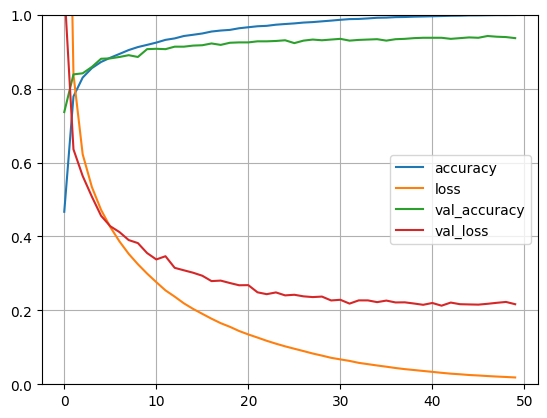

In [ ]:
pd.DataFrame(train_n.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_onehot_train)
val_loss, val_acc = model.evaluate(x_val, y_onehot_val)
test_loss, test_acc = model.evaluate(x_test, y_onehot_test)

print(f"Train accuracy: {train_acc:.4f}, loss: {train_loss:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, loss: {val_loss:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, loss: {test_loss:.4f}")


650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9991 - loss: 0.0171
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9255 - loss: 0.2528
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9454 - loss: 0.2270
Train accuracy: 0.9994, loss: 0.0165
Val accuracy:   0.9365, loss: 0.2167
Test accuracy:  0.9385, loss: 0.2424


## 7. 테스트 데이터 중 예측에 실패한 사례 살펴보기

In [ ]:
y_pred_prob = model.predict(x_test)

# axis=-1 은 axis=1과 동일
y_pred = np.argmax(y_pred_prob, axis=-1)

y_true = np.argmax(y_onehot_test, axis=-1)

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# 잘못 예측한 정보
wrong_idx = np.where(y_pred != y_true)[0]
wrong_idx

array([  27,   35,   65,   67,   72,  109,  130,  139,  172,  184,  199,
        206,  239,  243,  244,  287,  339,  402,  405,  424,  427,  460,
        494,  557,  625,  630,  648,  690,  696,  707,  727,  731,  754,
        820,  831,  850,  866,  874,  898,  929,  990,  995, 1024, 1076,
       1079, 1086, 1091, 1092, 1097, 1116, 1120, 1159, 1173, 1189, 1208,
       1226, 1227, 1253, 1262, 1284, 1297, 1319, 1324, 1350, 1359, 1372,
       1399, 1400, 1410, 1424, 1433, 1458, 1462, 1473, 1487, 1493, 1505,
       1514, 1527, 1532, 1561, 1573, 1574, 1585, 1601, 1604, 1620, 1626,
       1639, 1659, 1668, 1698, 1719, 1722, 1726, 1730, 1743, 1748, 1754,
       1767, 1783, 1818, 1823, 1832, 1842, 1848, 1850, 1853, 1859, 1874,
       1883, 1913, 1918, 1930, 1937, 1967, 1983, 1999, 2010, 2027, 2042,
       2057, 2058, 2060, 2075, 2081, 2090, 2096, 2098, 2122, 2129, 2173,
       2174, 2196, 2208, 2227, 2233, 2261, 2266, 2314, 2322, 2325, 2351,
       2353, 2364, 2366, 2375, 2396, 2429, 2487, 25

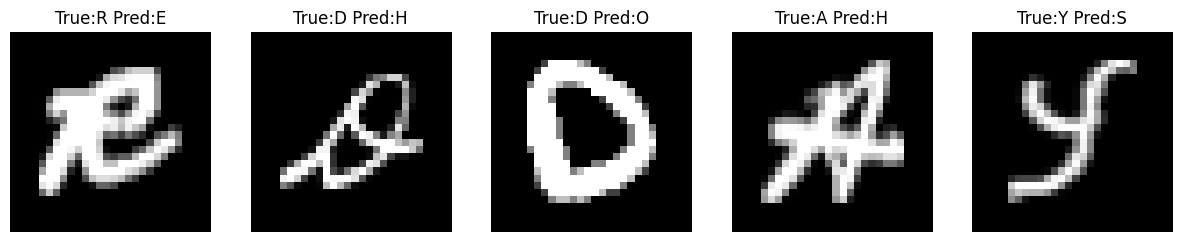

In [ ]:
# 첫 5개 틀린 사례
plt.figure(figsize=(15, 3))
for i, idx in enumerate(wrong_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')

    # 정수 → 문자
    true_label = encoder.inverse_transform([y_true[idx]])[0]
    pred_label = encoder.inverse_transform([y_pred[idx]])[0]
    plt.title(f"True:{true_label} Pred:{pred_label}")
    plt.axis('off')
plt.show()